<module 'matplotlib.pyplot' from '/home/raymond/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

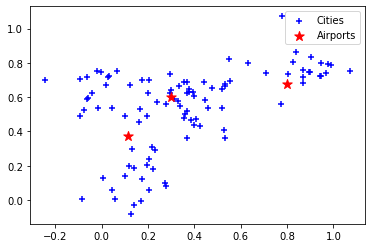

In [42]:
import random
import numpy as np

num_city = 100
num_air = 3
num_center = 5
sigma = 0.1
cities = set()
airports = []

for i in range(num_center):
    x = random.random()
    y = random.random()
    xc = np.random.normal(x, sigma, num_city//num_center)
    yc = np.random.normal(y, sigma, num_city//num_center)
    cities = cities.union(zip(xc, yc))


for i in range(num_air):
    x = random.random()
    y = random.random()
    airports.append((x,y)) 

import matplotlib.pyplot as plt

zip_cities = zip(*cities)
plt.scatter(*zip_cities, marker='+',color='b', label='Cities')
zip_airs = zip(*airports)
plt.scatter(*zip_airs, marker='*', color='r', s=100, label='Airports')
plt.legend()
plt

In [45]:
"""method for getting sum of squared distance between two points"""
def getDistance(point1, point2):
   return (point1[0] - point2[0])**2 + (point1[1] - point2[1])**2

"""method that takes in the airports as well as the cities 
   and returns a list containing lists of cities closest to 
   airport i (note: returned list organized by indexing of airports list
   e.g., partitionedCities[0] is the list of cities closest to airport 0) 
   O(a*c)"""
def partitionCitySet(airports, cities):
   partitionedCities = [[] for _ in range(len(airports))]

   for city in cities:
      airportDistances = []
      for airport in airports:
         airportDistances.append(getDistance(city, airport))
      partitionedCities[airportDistances.index(min(airportDistances))].append(city)

   return partitionedCities
      

partitionedCities = partitionCitySet(airports, cities)
def test(x,y,z):
   print(len(x), x, end='\n\n')
   print(len(y), y, end='\n\n')
   print(len(z), z, end='\n\n')
   # print(x + y + z)

test(*partitionedCities) 

32 [(0.2306486137746103, 0.29293418158453544), (0.04251313201977387, 0.5351545872265714), (0.2769527426777416, 0.08257212026708642), (0.04649923044751181, 0.056737290059804414), (-0.09541680964202282, 0.7042575206140719), (0.12599227849685585, -0.08046900797683737), (0.11875974456478264, 0.19711137734333584), (0.22325826866405435, 0.17952493428640898), (-0.06285221049833659, 0.590911697646377), (-0.05947888082508762, 0.593886213081844), (0.13943201109822945, 0.18431829841423308), (0.13855386482833965, -0.028621866920401834), (0.20478733696741136, 0.23984905324076738), (-0.08588675733597223, 0.007085694748730026), (0.13161825764879292, 0.297388083488642), (0.19551412167262672, 0.4880268352273024), (0.20269544289666383, 0.06039618495388212), (-0.2428364912549522, 0.7004996063498602), (0.21499592869567546, 0.31047598126315823), (0.10113784524859494, 0.13971591055260557), (-0.07774095968774442, 0.523846973156605), (0.1750653242836307, 0.1250017244001214), (0.16804532821917145, -0.005523464

In [76]:
"""Implementation of objective function: O(abc)"""
def objectiveFun(airports, cities):
    classifiedCities = partitionCitySet(airports, cities)
    objFunStartingVal = 0

    for airport in airports:
        for cityCluster in classifiedCities:
            for city in cityCluster:
                objFunStartingVal += getDistance(airport, city)
                
    return objFunStartingVal

'''Implementation of gradient descent'''
def gDescent(cities, airports, alpha, iterations):
    classifiedCities = partitionCitySet(airports, cities)
    newAirportCoordinates = []
    objectiveFunVals = []
    
    for _ in range(iterations):
        for airport in airports:
            dx = 0
            dy = 0
            for cityCluster in classifiedCities:
                for city in cityCluster:
                    dx += 2 * airport[0] - city[0]
                    dy += 2 * airport[1] - city[1]
            
        deltaCoordinates = (dx, dy)
        alphaTimesdxdy = tuple(map(lambda value: alpha * value, deltaCoordinates))
        newAirportLocation = tuple(map(lambda x,y: x-y, airport, alphaTimesdxdy))
        newAirportCoordinates.append(newAirportLocation)
        objectiveFunVals.append(objectiveFun(newAirportCoordinates, cities))
    
    return newAirportCoordinates, objectiveFunVals

# print(f'objective fun before first iteration of gDescent {objectiveFun(airports, cities)}')
# newAirports, objFun = gDescent(cities, airports, 0.0069)
# print(f'Airport Coordinates: {newAirports}\nnew objective fun val: {objFun}')


In [77]:
def main():
    iterations = 50
    alpha = 0.0069
    airportCoordinates, objectiveFunVals = gDescent(cities, airports, alpha, iterations)
    print(f'New Coordinates of Airports {airportCoordinates}')
    print(f"Objective function values as a function of iterations: {objectiveFunVals}")

main()

New Coordinates of Airports [(0.1330598037637218, 0.14304664480911927), (0.1330598037637218, 0.14304664480911927), (0.1330598037637218, 0.14304664480911927), (0.1330598037637218, 0.14304664480911927), (0.1330598037637218, 0.14304664480911927), (0.1330598037637218, 0.14304664480911927), (0.1330598037637218, 0.14304664480911927), (0.1330598037637218, 0.14304664480911927), (0.1330598037637218, 0.14304664480911927), (0.1330598037637218, 0.14304664480911927), (0.1330598037637218, 0.14304664480911927), (0.1330598037637218, 0.14304664480911927), (0.1330598037637218, 0.14304664480911927), (0.1330598037637218, 0.14304664480911927), (0.1330598037637218, 0.14304664480911927), (0.1330598037637218, 0.14304664480911927), (0.1330598037637218, 0.14304664480911927), (0.1330598037637218, 0.14304664480911927), (0.1330598037637218, 0.14304664480911927), (0.1330598037637218, 0.14304664480911927), (0.1330598037637218, 0.14304664480911927), (0.1330598037637218, 0.14304664480911927), (0.1330598037637218, 0.14